In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import yfinance as yf
from datetime import datetime

In [3]:
# Suppress all warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [4]:
# Set the working directory
os.chdir(r"D:\Benson\aUpWork\Douglas Backtester Algo\Backtester Algorithm\Data")

In [5]:
# Function to view all rows and columns
def view_all():
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    print("Display set to show all rows and columns.")

# Function to reset display options to default
def reset_display():
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    print("Display options reset to default.")

# Example Usage
view_all()  # Set to view all rows and columns
reset_display()  # Reset to default display settings


Display set to show all rows and columns.
Display options reset to default.


In [6]:
# Load the excel data file
file_path = r"YMAG ETF Price & Dividends.xlsx"
YMAG = pd.read_excel(file_path)

# Convert 'Date' column to datetime
YMAG["Date"] = pd.to_datetime(YMAG["Date"])

# Drop unnecessary columns
YMAG = YMAG.drop(columns=['Vol.', 'Change %'])

# Display the first few rows
YMAG

,Date,Price,Open,High,Low
0,2025-02-13,0.05,NaN,NaN,NaN
1,2025-02-13,18.19,18.05,18.20,18.00
2,2025-02-12,18.04,17.91,18.08,17.85
3,2025-02-11,18.01,18.07,18.12,17.95
4,2025-02-10,18.07,18.13,18.21,18.07
...,...,...,...,...,...
284,2024-02-06,20.20,20.16,20.28,20.05
285,2024-02-05,20.19,20.34,20.34,19.95
286,2024-02-02,20.30,20.18,20.32,19.99
287,2024-02-01,19.75,19.68,19.76,19.60


In [7]:
# check for missing values in YMAX
YMAG.isnull().sum()

Date      0
Price     0
Open     28
High     28
Low      28
dtype: int64

In [8]:
# Load the Excel data file
file_path = r"YMAX ETF Price & Dividends.xlsx"
YMAX = pd.read_excel(file_path)

# Convert 'Date' column to datetime
YMAX["Date"] = pd.to_datetime(YMAX["Date"])

# Drop unnecessary columns
YMAX = YMAX.drop(columns=['Vol.', 'Change %'])

# Display the first few rows
YMAX

,Date,Price,Open,High,Low
0,2025-02-13,0.15,NaN,NaN,NaN
1,2025-02-13,16.64,16.47,16.64,16.38
2,2025-02-12,16.60,16.39,16.62,16.33
3,2025-02-11,16.41,16.57,16.63,16.39
4,2025-02-10,16.67,16.53,16.68,16.53
...,...,...,...,...,...
294,2024-01-24,20.36,20.51,20.53,20.35
295,2024-01-23,20.27,20.21,20.28,20.17
296,2024-01-22,20.18,20.13,20.31,20.11
297,2024-01-19,20.12,20.03,20.12,19.88


In [9]:
# Check for missing values in YMAX
YMAX.isnull().sum()

Date      0
Price     0
Open     29
High     29
Low      29
dtype: int64

In [10]:
#Extracting the Dividends data
# Create a new DataFrame with only rows where 'Open' is NaN
YMAX_Dividends = YMAX[YMAX['Open'].isna()].copy()

# Drop unnecessary columns
YMAX_Dividends = YMAX_Dividends.drop(columns=['Open', 'High', 'Low'])

# Rename 'Price' column to 'Dividends'
YMAX_Dividends = YMAX_Dividends.rename(columns={'Price': 'YMAX Dividends'})

# Display the new DataFrame
YMAX_Dividends

,Date,YMAX Dividends
0,2025-02-13,0.15
6,2025-02-06,0.19
12,2025-01-30,0.15
18,2025-01-23,0.17
23,2025-01-16,0.11
29,2025-01-08,0.14
33,2025-01-03,0.18
38,2024-12-27,0.25
44,2024-12-19,0.14
50,2024-12-12,0.12


In [11]:
#Extracting the Dividends data
# Create a new DataFrame with only rows where 'Open' is NaN
YMAG_Dividends = YMAG[YMAG['Open'].isna()].copy()

# Drop unnecessary columns
YMAG_Dividends = YMAG_Dividends.drop(columns=['Open', 'High', 'Low'])

# Rename 'Price' column to 'Dividends'
YMAG_Dividends = YMAG_Dividends.rename(columns={'Price': 'YMAG Dividends'})

# Display the new DataFrame
YMAG_Dividends

,Date,YMAG Dividends
0,2025-02-13,0.05
6,2025-02-06,0.19
12,2025-01-30,0.19
18,2025-01-23,0.10
23,2025-01-16,0.05
29,2025-01-08,0.16
33,2025-01-03,0.31
38,2024-12-27,0.17
44,2024-12-19,0.06
55,2024-12-05,0.28


In [12]:
#check for missing values in YMAG_Dividends
print(YMAG_Dividends.isnull().sum())
print(YMAX_Dividends.isnull().sum())

Date              0
YMAG Dividends    0
dtype: int64
Date              0
YMAX Dividends    0
dtype: int64


In [13]:
# Drop all rows with NaN values in YMAX and YMAG, to remove the duplicate rows where dividends were
YMAX = YMAX.dropna()
YMAG = YMAG.dropna()

In [14]:
# Merge dividends with YMAX price data
YMAX = YMAX.merge(YMAX_Dividends, on="Date", how="left")
YMAX["YMAX Dividends"].fillna(0, inplace=True)  # Fill missing dividends with 0

# Merge dividends with YMAG price data
YMAG = YMAG.merge(YMAG_Dividends, on="Date", how="left")
YMAG["YMAG Dividends"].fillna(0, inplace=True)  # Fill missing dividends with 0

# Rename price in YMAX to YMAX
YMAX = YMAX.rename(columns={'Price': 'YMAX'})

# Rename price in YMAG to YMAG
YMAG = YMAG.rename(columns={'Price': 'YMAG'})

# Display merged data
YMAX.head()


,Date,YMAX,Open,High,Low,YMAX Dividends
0,2025-02-13,16.64,16.47,16.64,16.38,0.15
1,2025-02-12,16.60,16.39,16.62,16.33,0.00
2,2025-02-11,16.41,16.57,16.63,16.39,0.00
3,2025-02-10,16.67,16.53,16.68,16.53,0.00
4,2025-02-07,16.44,16.51,16.69,16.40,0.00


In [15]:
# Display merged data
YMAG.head()

,Date,YMAG,Open,High,Low,YMAG Dividends
0,2025-02-13,18.19,18.05,18.20,18.00,0.05
1,2025-02-12,18.04,17.91,18.08,17.85,0.00
2,2025-02-11,18.01,18.07,18.12,17.95,0.00
3,2025-02-10,18.07,18.13,18.21,18.07,0.00
4,2025-02-07,18.07,18.24,18.34,18.00,0.00


In [16]:
# check and print sum of missing values in YMAX
print(YMAX.isnull().sum())

# check and print sum of missing values in YMAG
print(YMAG.isnull().sum())

Date              0
YMAX              0
Open              0
High              0
Low               0
YMAX Dividends    0
dtype: int64
Date              0
YMAG              0
Open              0
High              0
Low               0
YMAG Dividends    0
dtype: int64


In [17]:
# Merge dividends with YMAX price data
YMAG_YMAX_Divs_n_prices = YMAX[["Date", "YMAX", "YMAX Dividends"]].merge(YMAG[["Date", "YMAG", "YMAG Dividends"]],
                                                                         on="Date", how="left")

#check and print the sum of missing values
print(YMAG_YMAX_Divs_n_prices.isna().sum())

# Drop all rows with NaN values in YMAG_YMAX_Divs_n_prices
YMAG_YMAX_Divs_n_prices = YMAG_YMAX_Divs_n_prices.dropna()
print("sum of missing values after dropping them")
print(YMAG_YMAX_Divs_n_prices.isna().sum())


Date              0
YMAX              0
YMAX Dividends    0
YMAG              9
YMAG Dividends    9
dtype: int64
sum of missing values after dropping them
Date              0
YMAX              0
YMAX Dividends    0
YMAG              0
YMAG Dividends    0
dtype: int64


In [18]:
# Convert 'Date' column to datetime format
YMAG_YMAX_Divs_n_prices['Date'] = pd.to_datetime(YMAG_YMAX_Divs_n_prices['Date'])

# Set 'Date' as the index
YMAG_YMAX_Divs_n_prices.set_index('Date', inplace=True)

YMAG_YMAX_Divs_n_prices 


,YMAX,YMAX Dividends,YMAG,YMAG Dividends
Date,,,,
2025-02-13,16.64,0.15,18.19,0.05
2025-02-12,16.60,0.00,18.04,0.00
2025-02-11,16.41,0.00,18.01,0.00
2025-02-10,16.67,0.00,18.07,0.00
2025-02-07,16.44,0.00,18.07,0.00
...,...,...,...,...
2024-02-06,20.61,0.00,20.20,0.00
2024-02-05,20.44,0.00,20.19,0.00
2024-02-02,20.70,0.00,20.30,0.00


In [19]:
# Download the data of VIX, VVIX, and QQQ ETF
VIX = yf.download('^VIX', start='2024-01-01', end='2025-02-14')
VVIX = yf.download('^VVIX', start='2024-01-01', end='2025-02-14')
QQQ = yf.download('QQQ', start='2024-01-01', end='2025-02-14')

# Rename the columns
VIX.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
VVIX.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
QQQ.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Rename "Close" column and drop other columns
VIX = VIX[['Close']].rename(columns={'Close': 'VIX'})
VVIX = VVIX[['Close']].rename(columns={'Close': 'VVIX'})
QQQ = QQQ[['Close']].rename(columns={'Close': 'QQQ'})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
# Merge VIX, VVIX, and QQQ DataFrames on the Date index
merged_vix_vvix_qqq_df = VIX \
    .merge(VVIX, left_index=True, right_index=True, how='outer') \
    .merge(QQQ, left_index=True, right_index=True, how='outer')

# Merge the VIX, VVIX, and QQQ DataFrames with the YMAG_YMAX_Divs_n_prices DataFrame
All_Assets = YMAG_YMAX_Divs_n_prices.merge(merged_vix_vvix_qqq_df, left_index=True, right_index=True, how='outer')

#Drop the NaN values
All_Assets = All_Assets.dropna()

# Sort the DataFrame by 'Date' in descending order
All_Assets = All_Assets.sort_values(by='Date', ascending=True)

# Print the sum of missing values in each column
print("The sum of missing values in each column:")
print(All_Assets.isnull().sum())

The sum of missing values in each column:
YMAX              0
YMAX Dividends    0
YMAG              0
YMAG Dividends    0
VIX               0
VVIX              0
QQQ               0
dtype: int64


In [21]:
# print rhe info of the merged DataFrame
All_Assets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2024-01-31 to 2025-02-13
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YMAX            261 non-null    float64
 1   YMAX Dividends  261 non-null    float64
 2   YMAG            261 non-null    float64
 3   YMAG Dividends  261 non-null    float64
 4   VIX             261 non-null    float64
 5   VVIX            261 non-null    float64
 6   QQQ             261 non-null    float64
dtypes: float64(7)
memory usage: 16.3 KB


In [22]:
# Display the first few rows of the merged DataFrame
All_Assets

,YMAX,YMAX Dividends,YMAG,YMAG Dividends,VIX,VVIX,QQQ
Date,,,,,,,
2024-01-31,20.20,0.00,19.49,0.00,14.350000,87.559998,414.506714
2024-02-01,20.39,0.00,19.75,0.00,13.880000,84.830002,419.387695
2024-02-02,20.70,0.00,20.30,0.00,13.850000,83.309998,426.475616
2024-02-05,20.44,0.00,20.19,0.00,13.670000,79.580002,425.918945
2024-02-06,20.61,0.00,20.20,0.00,13.060000,76.970001,425.063965
...,...,...,...,...,...,...,...
2025-02-07,16.44,0.00,18.07,0.00,16.540001,101.489998,522.919983
2025-02-10,16.67,0.00,18.07,0.00,15.810000,99.150002,529.250000
2025-02-11,16.41,0.00,18.01,0.00,16.020000,99.820000,527.989990


In [23]:
# Define rolling window size (e.g., 21 days)
window_size = 21

# Compute daily returns for each asset in All_Assets, excluding dividends columns
returns = All_Assets.loc[:, ~All_Assets.columns.str.contains('Dividends')].pct_change().dropna()

# Initialize stats_df with rolling volatilities
Prices_and_stats_df = pd.DataFrame(index=returns.index)

# Compute rolling correlations
Prices_and_stats_df["YMAX-VIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VIX"])
Prices_and_stats_df["YMAX-VVIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VVIX"])
Prices_and_stats_df["YMAG-VIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VIX"])
Prices_and_stats_df["YMAG-VVIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VVIX"])

#Merge the prices and stats data
Prices_and_stats_df = All_Assets.merge(Prices_and_stats_df, left_index=True, right_index=True)

# Drop NaN values resulting from rolling calculations
Prices_and_stats_df = Prices_and_stats_df.dropna()

# Rest the prices and stats data index
Prices_and_stats_df.reset_index(inplace=True)

# Display the first and last few rows of Prices_and_stats_df
Prices_and_stats_df

,Date,YMAX,YMAX Dividends,YMAG,YMAG Dividends,VIX,VVIX,QQQ,YMAX-VIX Correlation,YMAX-VVIX Correlation,YMAG-VIX Correlation,YMAG-VVIX Correlation
0,2024-03-01,21.67,0.00,21.00,0.00,13.110000,77.680000,442.977509,-0.626499,-0.549622,-0.508677,-0.456559
1,2024-03-04,21.60,0.00,20.74,0.00,13.490000,79.410004,441.396942,-0.626533,-0.549422,-0.510632,-0.458702
2,2024-03-05,21.17,0.00,20.41,0.00,14.460000,83.910004,433.474030,-0.675417,-0.589907,-0.593275,-0.510036
3,2024-03-06,21.38,0.00,20.37,0.00,14.500000,83.110001,436.197815,-0.706867,-0.681932,-0.603820,-0.546858
4,2024-03-07,21.65,0.00,20.65,0.00,14.440000,82.129997,442.818512,-0.700723,-0.679942,-0.611949,-0.559811
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2025-02-07,16.44,0.00,18.07,0.00,16.540001,101.489998,522.919983,-0.720658,-0.588653,-0.744953,-0.612972
236,2025-02-10,16.67,0.00,18.07,0.00,15.810000,99.150002,529.250000,-0.776437,-0.666927,-0.760448,-0.645467
237,2025-02-11,16.41,0.00,18.01,0.00,16.020000,99.820000,527.989990,-0.749829,-0.646186,-0.772829,-0.689207
238,2025-02-12,16.60,0.00,18.04,0.00,15.890000,98.739998,528.299988,-0.779082,-0.724501,-0.777147,-0.713569


In [24]:
# Export the data to excel
# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('Strategy 2 Prices and Statistics.xlsx', engine='xlsxwriter') as writer:
    # Write Prices_and_stats_df to the first sheet
    Prices_and_stats_df.to_excel(writer, sheet_name='Prices and Correlations', index=False)
    
print(f"✅ Performance DataFrames successfully saved to 'Prices_and_stats_df.xlsx'")

✅ Performance DataFrames successfully saved to 'Prices_and_stats_df.xlsx'


## BACKTESTING THE INVESTMENT RULES

### **📌 Investment Rules for Strategy 2**

1. **Invest Only If:**
   - **VIX is between 15 and 20** (inclusive), **AND**
   - **VVIX is between 90 and 100** (i.e., VVIX is below 100 but not less than 90).

   > **Interpretation**: Go long on YMAX/YMAG (without a hedge) **only** when both conditions are met.

2. **Exit the Market If:**
   - **VIX drops below 15** or **rises above 20**, **OR**
   - **VVIX goes above or equal to 100, or falls below 90**.

   > **Interpretation**: If either VIX or VVIX is outside the desired range, close all positions and remain in cash.

3. **Re-Enter the Market When:**
   - **VIX is again within 15–20**, **AND**
   - **VVIX has stabilized in a tighter range – specifically, between 90 and 95 (inclusive).**

   > **Interpretation**: Re-enter only when both VIX is back in the 15–20 range and VVIX has come back to a “safe zone” (90–95).

---

### **🚀 Summary of Logic**

1. **In-Market Condition**:  
   $15 \leq \text{VIX} \leq 20$ **AND** $90 \leq \text{VVIX} < 100$.

2. **Exit Condition**:  
   $\text{VIX} < 15$ **OR** $\text{VIX} > 20$ **OR** $\text{VVIX} < 90$ **OR** $\text{VVIX} \geq 100$.

3. **Re-Entry Condition**:  
   $\text{VIX}$ returns to $[15,20]$ **AND** $\text{VVIX}$ is in the range $[90,95]$.


#### YMAX BACKTEST:

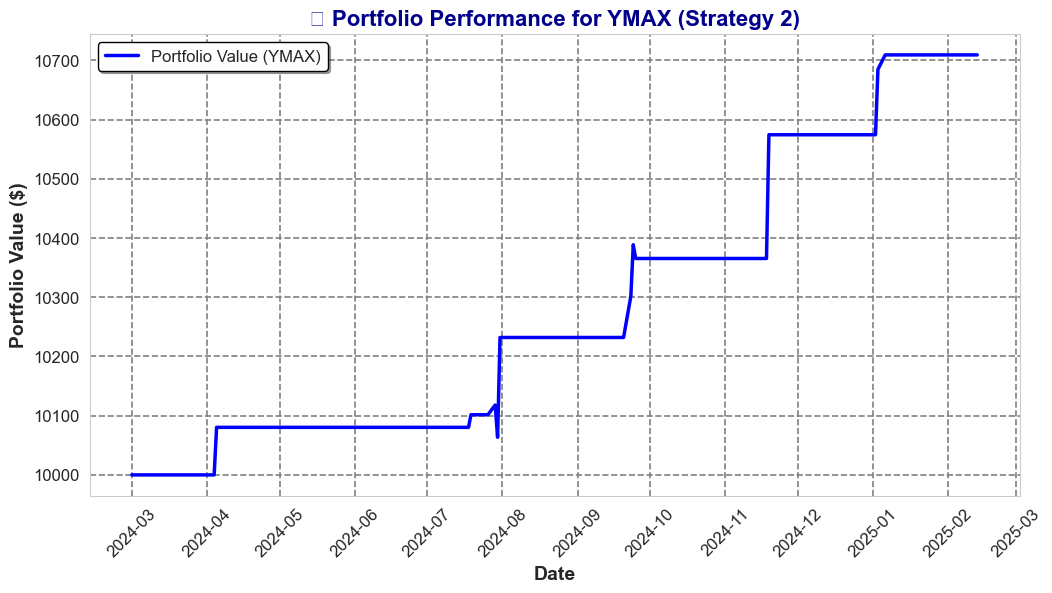

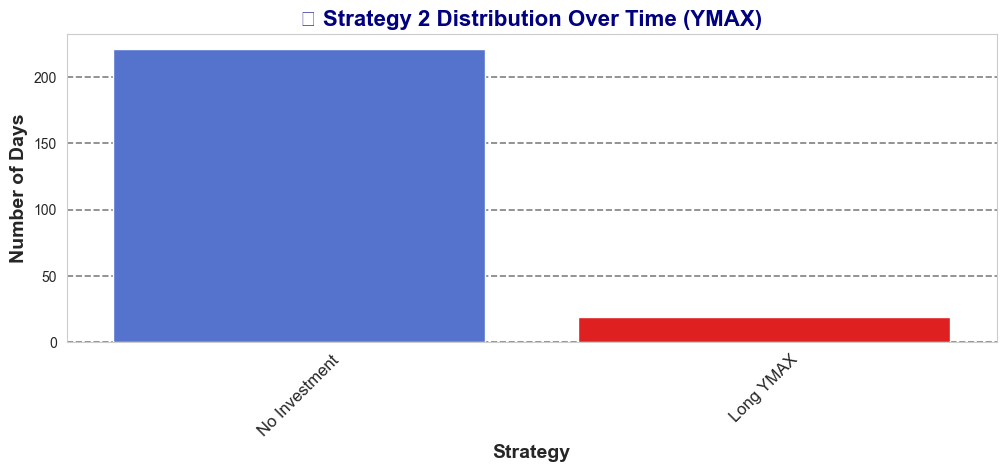

In [ ]:
# ------------------------------------------------------------
# 1) PREPARE THE DATA
# ------------------------------------------------------------
# DataFrame "Prices_and_stats_df" with Columns: ["Date", "YMAX", "YMAX Dividends", "VIX", "VVIX", ...]
# We copy it for this strategy's backtest on YMAX.
ymax_df = Prices_and_stats_df.copy()

# Define initial portfolio value
initial_investment = 10000.0  # $10,000 starting capital

# Sort by date to ensure chronological order
ymax_df.sort_values("Date", inplace=True)
ymax_df.reset_index(drop=True, inplace=True)

# ------------------------------------------------------------
# 2) DEFINE HELPER FUNCTIONS FOR CONDITIONS
# ------------------------------------------------------------
def in_market_condition(vix, vvix):
    """
    Condition for staying in the market once we're already invested:
    15 <= VIX <= 20, 90 <= VVIX < 100
    """
    return (15 <= vix <= 20) and (90 <= vvix < 100)

def reentry_condition(vix, vvix):
    """
    Stricter condition for re-entering the market after an exit:
    15 <= VIX <= 20, 90 <= VVIX <= 95
    """
    return (15 <= vix <= 20) and (90 <= vvix <= 95)

def exit_condition(vix, vvix):
    """
    If VIX < 15 or VIX > 20, or VVIX < 90 or VVIX >= 100 -> EXIT
    """
    return (vix < 15) or (vix > 20) or (vvix < 90) or (vvix >= 100)

# ------------------------------------------------------------
# 3) SET UP BACKTEST COLUMNS AND INITIAL VALUES
# ------------------------------------------------------------
ymax_df["Portfolio_Value"] = np.nan
ymax_df.loc[0, "Portfolio_Value"] = initial_investment

# Boolean: are we currently invested?
ymax_df["In_Market"] = False
ymax_df.loc[0, "In_Market"] = False

# Track how many shares of YMAX we hold
ymax_df["Shares_Held"] = 0.0
ymax_df.loc[0, "Shares_Held"] = 0.0

# Strategy label for each day
ymax_df["Strategy"] = "No Investment"

# ------------------------------------------------------------
# 4) BACKTEST LOOP
# ------------------------------------------------------------
for i in range(1, len(ymax_df)):
    # Copy forward previous day's portfolio value, in_market status, and shares
    ymax_df.loc[i, "Portfolio_Value"] = ymax_df.loc[i-1, "Portfolio_Value"]
    ymax_df.loc[i, "In_Market"] = ymax_df.loc[i-1, "In_Market"]
    ymax_df.loc[i, "Shares_Held"] = ymax_df.loc[i-1, "Shares_Held"]

    # Current day data
    vix_today = ymax_df.loc[i, "VIX"]
    vvix_today = ymax_df.loc[i, "VVIX"]
    ymax_price_today = ymax_df.loc[i, "YMAX"]
    ymax_div_today = ymax_df.loc[i, "YMAX Dividends"]

    # Are we in the market at the start of today?
    currently_in_market = ymax_df.loc[i-1, "In_Market"]

    if currently_in_market:
        # Check if we remain in the market or exit
        if exit_condition(vix_today, vvix_today):
            # EXIT: close position -> shares = 0, remain in cash
            ymax_df.loc[i, "In_Market"] = False
            ymax_df.loc[i, "Shares_Held"] = 0.0
            ymax_df.loc[i, "Strategy"] = "No Investment"
            # Portfolio_Value stays the same as yesterday's (carried forward)
        else:
            # REMAIN IN MARKET: update portfolio value based on today's price + dividend
            shares_held = ymax_df.loc[i, "Shares_Held"]
            new_portfolio_value = shares_held * (ymax_price_today + ymax_div_today)
            ymax_df.loc[i, "Portfolio_Value"] = new_portfolio_value
            ymax_df.loc[i, "Strategy"] = "Long YMAX"
    else:
        # currently out of market, check re-entry condition
        if reentry_condition(vix_today, vvix_today):
            # ENTER: buy shares with all capital
            cash_available = ymax_df.loc[i, "Portfolio_Value"]
            if ymax_price_today > 0:
                shares_bought = cash_available / ymax_price_today
                ymax_df.loc[i, "Shares_Held"] = shares_bought
                ymax_df.loc[i, "In_Market"] = True
                ymax_df.loc[i, "Strategy"] = "Long YMAX"
                # Immediately compute today's new portfolio value
                new_portfolio_value = shares_bought * (ymax_price_today + ymax_div_today)
                ymax_df.loc[i, "Portfolio_Value"] = new_portfolio_value
            else:
                # If price is 0 or invalid, skip
                ymax_df.loc[i, "Strategy"] = "No Investment"
        else:
            # Stay in cash
            ymax_df.loc[i, "Strategy"] = "No Investment"

# ------------------------------------------------------------
# 5) COMPUTE DAILY RETURNS
# ------------------------------------------------------------
ymax_df["Portfolio_Return"] = ymax_df["Portfolio_Value"].pct_change()

# ------------------------------------------------------------
# 6) VISUALIZE RESULTS
# ------------------------------------------------------------
sns.set_style("whitegrid")

# (A) Portfolio Performance Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x=ymax_df["Date"],
    y=ymax_df["Portfolio_Value"],
    color="blue",
    linewidth=2.5,
    label="Portfolio Value (YMAX)"
)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xlabel("Date", fontsize=14, fontweight="bold")
plt.ylabel("Portfolio Value ($)", fontsize=14, fontweight="bold")
plt.title("📈 Portfolio Performance for YMAX (Strategy 2)", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", linewidth=1.2, color="gray")
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, edgecolor="black")
plt.show()

# (B) Strategy Usage Over Time
plt.figure(figsize=(12, 4))
ax = sns.barplot(
    x=ymax_df["Strategy"].value_counts().index,
    y=ymax_df["Strategy"].value_counts().values,
    palette=["royalblue", "red", "green"]
)
plt.xlabel("Strategy", fontsize=14, fontweight="bold")
plt.ylabel("Number of Days", fontsize=14, fontweight="bold")
plt.title("📊 Strategy 2 Distribution Over Time (YMAX)", fontsize=16, fontweight="bold", color="navy")
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=1.2, color="gray")
plt.show()


### **📌 Investment Rules for Strategy 3:**
2. **Rule 2**: If **VIX is above 20**, **Long YMAX/YMAG (no hedge)** and remain fully invested.
3. **Rule 3**: If **VIX is under 15**, **Long YMAX/YMAG (no hedge)** and backtest separately to analyze performance.
4. **Rule 4**: If **VVIX goes above 100**, **exit the market** (close all positions).
5. **Rule 5**: Re-enter the market when **VVIX drops back below 95 or 90** (to avoid losses and whipsaws).

##### **📌 Summary**
- **Exit conditions** are based on **VVIX spikes above 100**.
- **Re-entry conditions** trigger only when **VVIX stabilizes under 95-90**.


### **📌 Investment Rules for Strategy 4:**
1. **Rule 1**: If **VIX is under 15**, **Long YMAX/YMAG (no hedge)** and backtest separately to analyze performance.
2. **Rule 2**: If **VVIX goes above 100**, **exit the market** (close all positions).
3. **Rule 3**: Re-enter the market when **VVIX drops back below 95 or 90** (to avoid losses and whipsaws).

##### **📌 Summary**
- **Exit conditions** are based on **VVIX spikes above 100**.
- **Re-entry conditions** trigger only when **VVIX stabilizes under 95-90**.
